#BrandMind Cloth Classification.

##Business Problem.
BrandMind contains multiple clothing categories including so this project aims to classify the clothing categories.

##Overview

The goal of this project is to create TensorFlow models to perform the classification of different clothing items.

The Main Parts of this project is as follows:

1. Data Preparation:
 - Downloads, understands, and prepares the image data for modeling.
2. Model Creation:
 - Constructs Tensorflow models for classifications.

3. Model Evaluation:
 - Evaluating the model performances based on Classification accuracy.

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib
from google.colab import files

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Activation, Dropout, BatchNormalization

from keras.applications import VGG19
from keras.applications.vgg19 import preprocess_input




## Data Preparation

### Download and Explore the Dataset
In this section, we prepare the data to perform modeling.
As a first step, we downloaded the data directly from the link provided(https://drive.google.com/file/d/1qTc4DWUihozI4xNI_B4XP2E-LXcgdVET/view).

In [4]:
#Downloading using key in the link
!gdown --id 1qTc4DWUihozI4xNI_B4XP2E-LXcgdVET


Downloading...
From: https://drive.google.com/uc?id=1qTc4DWUihozI4xNI_B4XP2E-LXcgdVET
To: /content/Products.zip
167MB [00:01, 105MB/s] 


In [5]:
#Unzipping the zipped file
!unzip Products.zip

Streaming output truncated to the last 5000 lines.
  inflating: Products/trousers/trousers-68.jpg  
  inflating: __MACOSX/Products/trousers/._trousers-68.jpg  
  inflating: Products/trousers/trousers-40.jpg  
  inflating: __MACOSX/Products/trousers/._trousers-40.jpg  
  inflating: Products/trousers/trousers-54.jpg  
  inflating: __MACOSX/Products/trousers/._trousers-54.jpg  
  inflating: Products/trousers/trousers-130.jpg  
  inflating: __MACOSX/Products/trousers/._trousers-130.jpg  
  inflating: Products/trousers/trousers-124.jpg  
  inflating: __MACOSX/Products/trousers/._trousers-124.jpg  
  inflating: Products/trousers/trousers-118.jpg  
  inflating: __MACOSX/Products/trousers/._trousers-118.jpg  
  inflating: Products/trousers/trousers-0.jpg  
  inflating: __MACOSX/Products/trousers/._trousers-0.jpg  
  inflating: Products/trousers/trousers-285.jpg  
  inflating: __MACOSX/Products/trousers/._trousers-285.jpg  
  inflating: Products/trousers/trousers-291.jpg  
  inflating: __MACOSX

In [6]:
## Checking the contents of the folder
PATH = '/content/Products'
os.listdir(PATH)

['crop-tops',
 'coats',
 'sneakers',
 'blazers',
 'sunglasses',
 'hoodies',
 'scarf',
 'cami-tops',
 'skirts',
 'chelsea-boots',
 'bracelets',
 'gloves',
 'beanie',
 'stilettos',
 'bikini',
 'pumps',
 'business-suits',
 'waistcoat',
 'boots',
 'evening-gowns',
 'earrings',
 'bodysuit',
 'boat-shoes',
 'trousers',
 'bowtie',
 '.DS_Store',
 'demin-jackets',
 'wristwatch',
 'boatneck-tops',
 'tuxedos']

In [7]:
!rm '/content/Products/.DS_Store'

Now we have a Dataset with images of 29 classes of Dresses saved in a different folder. We can check the total number of images and let's visualize the images.

In [124]:
data_dir = pathlib.Path('Products')

In [125]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print("Total number of Image is",image_count)

Total number of Image is 9398


So the data contains a total of 9398 images of 29 classes, now visualize image for understanding. 

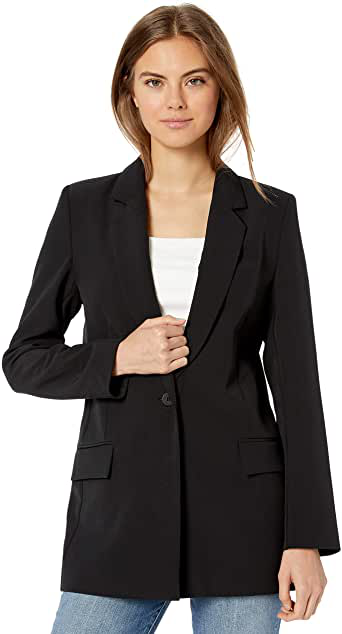

In [10]:
blazers = list(data_dir.glob('blazers/*'))
PIL.Image.open(str(blazers[15]))

###Create Dataset 
Here we load these images off disk using the helpful image_dataset_from_directory utility. Then create train, validation and test directories for modelling.


In [126]:
## parameter for loading
batch_size = 32
img_height = 212
img_width = 212


In [127]:
##Creating train dataset

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 9398 files belonging to 29 classes.
Using 7519 files for training.


In [13]:
## Validation data set
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9398 files belonging to 29 classes.
Using 1879 files for validation.


So we split the data to two parts as train and validation datas. But we need test dataset also for evaluating model performance. So splits the validation data to make the test data set.

In [14]:
val_batches = tf.data.experimental.cardinality(val_ds)
test_dataset = val_ds.take(val_batches // 5)
validation_dataset = val_ds.skip(val_batches // 5)



In [15]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 48
Number of test batches: 11


In [128]:

##Class names of the datas
class_names = train_ds.class_names
print(class_names)

['beanie', 'bikini', 'blazers', 'boat-shoes', 'boatneck-tops', 'bodysuit', 'boots', 'bowtie', 'bracelets', 'business-suits', 'cami-tops', 'chelsea-boots', 'coats', 'crop-tops', 'demin-jackets', 'earrings', 'evening-gowns', 'gloves', 'hoodies', 'pumps', 'scarf', 'skirts', 'sneakers', 'stilettos', 'sunglasses', 'trousers', 'tuxedos', 'waistcoat', 'wristwatch']


###Data Visualization
Below id the first 9 images from datset with labels.

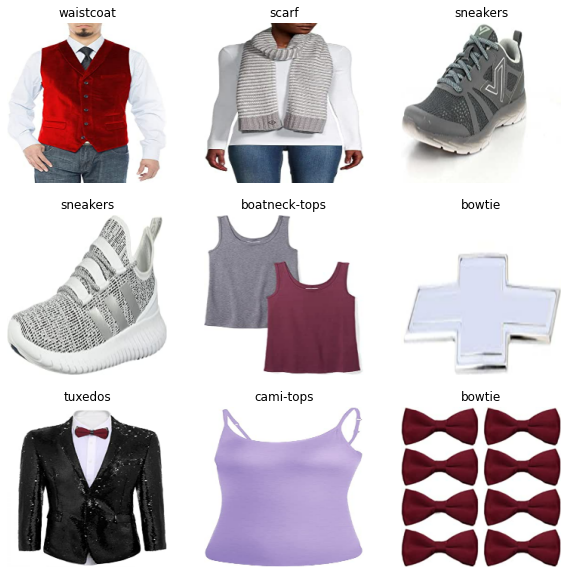

In [19]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [20]:
##Checking batches of data
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 212, 212, 3)
(32,)


Before modeling, now let's configure the data for performance. 
Uses 'Dataset.cache()' to keep the images in memory after they're loaded off disk during the first epoch. This will ensure the dataset does not become a bottleneck while training the model. 

In [22]:

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


##Model Creation
Our data is prepared for modeling. now we will start the modeling. In this project, we are trying to build four models using the Keras Framework:
1. CNN with 1 Convolutional Layer
2. CNN with 3 Convolutional Layer
3. CNN with 4 Convolutional Layer
4. Transfer Learning with pre-trained 'MobileNet V2' Model

Since the number of images we have is not big, modeling may result in overfitting. One of the methods to avoid overfitting is augmenting the data, by using random transformations that yield believable-looking images. This helps to expose the model to more aspects of the data and generalize better.

We can implement data augmentation using the layers from tf.keras.layers.experimental.preprocessing and it will be included inside the models.

In [129]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1), ## Random Rotation
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

###CNN-1 Model
The first model is CNN with one convolutional neural network.
Applied 'relu' activation function and 'adam' optimizer for the models.

In [131]:
## Defining functions for compiling and training the data
def compile_model(model):
 model.compile(optimizer='adam', ## 'Adam' optimizer
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), ## loss is SparseCategoricalCrossentrpy
              metrics=['accuracy'])
 model.summary()
 return model

def train_model(model,epochs):
  history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
  return history

In [25]:
num_classes = 29 

In [27]:
##Defining CNN-1 Model
def cnn_1():
  model = Sequential([
  data_augmentation,                    
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

  layers.Conv2D(32, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),

  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
  
])
  
  return model

In [208]:

##Defining the visualization function for visualizing learning curve
def model_visualization(model,history,epochs,model_name):
   acc = history.history['accuracy']
   val_acc = history.history['val_accuracy']

   loss = history.history['loss']
   val_loss = history.history['val_loss']

   epochs_range = range(epochs)

   plt.figure(figsize=(15, 5))
   plt.subplot(1, 2, 1)
   plt.plot(epochs_range, acc,'bo', label='Training Accuracy')
   plt.plot(epochs_range, val_acc, 'b',label='Validation Accuracy')
   plt.legend(loc='lower right')
   plt.title('Training and Validation Accuracy of {}'.format(model_name))

   plt.subplot(1, 2, 2)
   plt.plot(epochs_range, loss,'bo', label='Training Loss')
   plt.plot(epochs_range, val_loss,'b', label='Validation Loss')
   plt.legend(loc='upper right')
   plt.title('Training and Validation Loss of {}'.format(model_name))
   plt.xlabel('Epochs')
   plt.savefig(model_name+"visualization.png")
   files.download(model_name+"visualization.png")
   plt.show()
   


   

In [108]:
cnn_1_model = cnn_1()
cnn_1_model = compile_model(cnn_1_model)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 212, 212, 3)       0         
_________________________________________________________________
rescaling_10 (Rescaling)     (None, 212, 212, 3)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 212, 212, 32)      896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 106, 106, 32)      0         
_________________________________________________________________
dropout_35 (Dropout)         (None, 106, 106, 32)      0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 106, 106, 64)      18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 53, 53, 64)       

In [109]:
cnn_1_model_history = train_model(cnn_1_model,50)

Epoch 1/50
235/235 [==============================] - 16s 66ms/step - loss: 4.0246 - accuracy: 0.0637 - val_loss: 2.7182 - val_accuracy: 0.2586
Epoch 2/50
235/235 [==============================] - 15s 65ms/step - loss: 2.7877 - accuracy: 0.2041 - val_loss: 2.6075 - val_accuracy: 0.2964
Epoch 3/50
235/235 [==============================] - 15s 65ms/step - loss: 2.5329 - accuracy: 0.2722 - val_loss: 2.3333 - val_accuracy: 0.3933
Epoch 4/50
235/235 [==============================] - 15s 65ms/step - loss: 2.3492 - accuracy: 0.3202 - val_loss: 2.2811 - val_accuracy: 0.3688
Epoch 5/50
235/235 [==============================] - 15s 64ms/step - loss: 2.2224 - accuracy: 0.3548 - val_loss: 2.2105 - val_accuracy: 0.3576
Epoch 6/50
235/235 [==============================] - 15s 65ms/step - loss: 2.1051 - accuracy: 0.3766 - val_loss: 2.2117 - val_accuracy: 0.3544
Epoch 7/50
235/235 [==============================] - 15s 65ms/step - loss: 1.9935 - accuracy: 0.4088 - val_loss: 2.1890 - val_accuracy:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

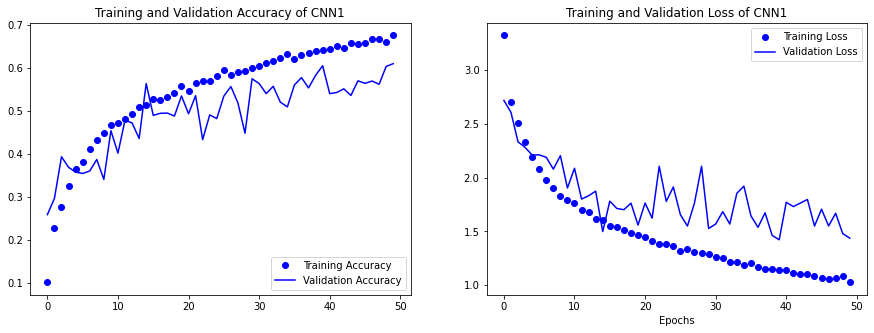

In [209]:
model_visualization(cnn_1_model,cnn_1_model_history,50,'CNN1')

In [218]:

##Saving model
cnn_1_model.save('CNN1Model.h5') 
files.download('CNN1Model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Trained the model for 50 epochs. Below is the learning curve for the model. Since the difference in training accuracy and validation accuracy is very less we can neglect the chance of overfitting.

### CNN-3 
The second model is CNN with three Convolutional neural networks. Included the Dropout layer to avoid overfitting.

In [66]:
def cnn_3():
  model = Sequential([
  data_augmentation,                    
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

  layers.Conv2D(32, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(2,2),
  layers.Dropout(0.25),

  layers.Conv2D(64, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(2,2),
  layers.Dropout(0.25),

  layers.Conv2D(128, (3,3), padding='same', activation='relu'),
  layers.Dropout(0.4),

  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.3),
  layers.Dense(num_classes,activation='softmax')
  
])
  
  return model

In [102]:
cnn_3_model = cnn_3()
cnn_3_model = compile_model(cnn_3_model)
cnn_3_model_history = train_model(cnn_3_model,50)


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 212, 212, 3)       0         
_________________________________________________________________
rescaling_8 (Rescaling)      (None, 212, 212, 3)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 212, 212, 32)      896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 106, 106, 32)      0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 106, 106, 32)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 106, 106, 64)      18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 53, 53, 64)       

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

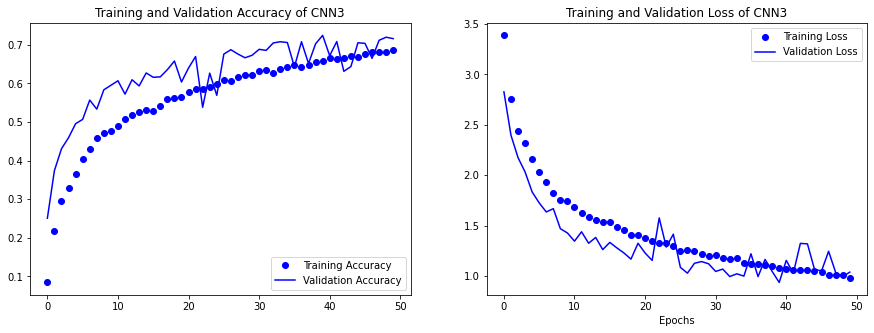

In [210]:
model_visualization(cnn_3_model,cnn_3_model_history,50,'CNN3')

In [219]:
cnn_3_model.save('CNN3Model.h5')
files.download('CNN3Model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The learning curve shows CNN-3 model performed better than cNN1 model.


### CNN-4 Model
CNN with 4 convolutional neural networks. Initially trained the model with the BatchNormalization layer and find out that it resulted in overfitting, so removed them.

In [101]:
def cnn_4():
  model = Sequential([
  data_augmentation,                    
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

  layers.Conv2D(32, (3,3), activation='relu'),
  layers.MaxPooling2D(2,2),
  layers.Dropout(0.25),
 # layers.BatchNormalization(),
  

  layers.Conv2D(32, (3,3), activation='relu'),
 # layers.BatchNormalization(),
  layers.MaxPooling2D(2,2),
  layers.Dropout(0.25),

  layers.Conv2D(64, (3,3), activation='relu'),
 # layers.BatchNormalization(),
  layers.Dropout(0.25),

  layers.Conv2D(128, (3,3), padding='same', activation='relu'),
  #layers.BatchNormalization(),
  layers.MaxPooling2D(2,2),
  layers.Dropout(0.25),

  layers.Flatten(),

  layers.Dense(512, activation='relu'),
  #layers.BatchNormalization(),
  layers.Dropout(0.5),

  layers.Dense(512, activation='relu'),
 # layers.BatchNormalization(),
  layers.Dropout(0.5),


  layers.Dense(num_classes,activation='softmax')
  
])
  
  return model

In [103]:
cnn_4_model = cnn_4()
cnn_4_model = compile_model(cnn_4_model)
cnn_4_model_history = train_model(cnn_4_model,50)


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 212, 212, 3)       0         
_________________________________________________________________
rescaling_9 (Rescaling)      (None, 212, 212, 3)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 210, 210, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 105, 105, 32)      0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 105, 105, 32)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 103, 103, 32)      9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 51, 51, 32)       

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

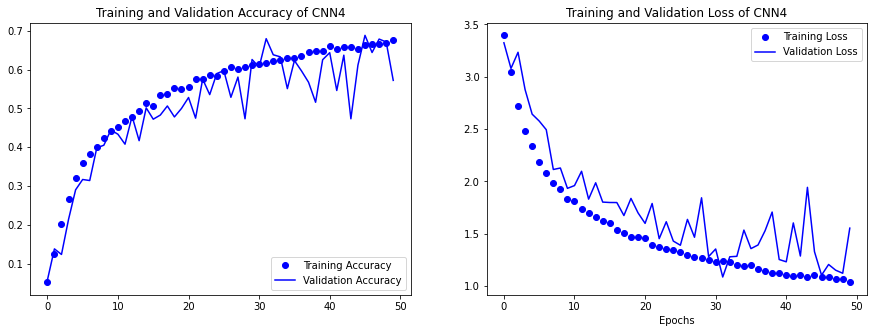

In [211]:
model_visualization(cnn_4_model,cnn_4_model_history,50,'CNN4')

In [216]:
cnn_4_model.save('CNN4Model.h5')
files.download('CNN4Model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Transfer learning with MobileNet V2
Here we create the base model from the MobileNet V2 model developed at Google. This is pre-trained on the ImageNet dataset, a large dataset consisting of 1.4M images and 1000 classes. 

We use the "bottleneck layers" from "MobileNet V2" since this layer features retain more generality as compared to the final/top layer.



In [ ]:
#preprocessing 
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
##rescale
rescale = tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1)
##create base model
IMG_SIZE = (img_height,img_width)
IMG_SHAPE = IMG_SIZE + (3,)
# Creating the base model from the  MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False, ## selecting bottom layers
                                               weights='imagenet')



In [195]:
image_batch, label_batch = next(iter(train_ds))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 7, 7, 1280)


The feauture extractor converted the image into  a 7x7x1280 block of features

In [196]:
base_model.trainable = False

In [197]:
## Model Summary
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 212, 212, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 106, 106, 32) 864         input_7[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 106, 106, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 106, 106, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

Using a tf.keras.layers.GlobalAveragePooling2D layer converted the features to a single 1280-element vector per image.

In [198]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [199]:
prediction_layer = tf.keras.layers.Dense(29)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 29)


Building the model by chaining together the data augmentation, rescaling, base_model and feature extractor layers.

In [200]:
inputs = tf.keras.Input(shape=(212, 212, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [201]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [202]:
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 212, 212, 3)]     0         
_________________________________________________________________
sequential_10 (Sequential)   (None, 212, 212, 3)       0         
_________________________________________________________________
tf.math.truediv_5 (TFOpLambd (None, 212, 212, 3)       0         
_________________________________________________________________
tf.math.subtract_5 (TFOpLamb (None, 212, 212, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dropout_41 (Dropout)         (None, 1280)              0   

In [203]:
len(model.trainable_variables)

2

In [204]:
initial_epochs = 10

loss0, accuracy0 = model.evaluate(validation_dataset)

48/48 [==============================] - 6s 79ms/step - loss: 3.8389 - accuracy: 0.0274


In [205]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 3.89
initial accuracy: 0.02


In [206]:
history = model.fit(train_ds,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

Epoch 1/10
235/235 [==============================] - 28s 105ms/step - loss: 3.0329 - accuracy: 0.1662 - val_loss: 2.2162 - val_accuracy: 0.4263
Epoch 2/10
235/235 [==============================] - 25s 105ms/step - loss: 1.9715 - accuracy: 0.4611 - val_loss: 1.5711 - val_accuracy: 0.5927
Epoch 3/10
235/235 [==============================] - 25s 105ms/step - loss: 1.5221 - accuracy: 0.5793 - val_loss: 1.2592 - val_accuracy: 0.6529
Epoch 4/10
235/235 [==============================] - 25s 104ms/step - loss: 1.2778 - accuracy: 0.6410 - val_loss: 1.1121 - val_accuracy: 0.6811
Epoch 5/10
235/235 [==============================] - 25s 105ms/step - loss: 1.1450 - accuracy: 0.6728 - val_loss: 1.0027 - val_accuracy: 0.7177
Epoch 6/10
235/235 [==============================] - 25s 105ms/step - loss: 1.0516 - accuracy: 0.7001 - val_loss: 0.9255 - val_accuracy: 0.7394
Epoch 7/10
235/235 [==============================] - 25s 104ms/step - loss: 0.9680 - accuracy: 0.7147 - val_loss: 0.8625 - val_ac

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

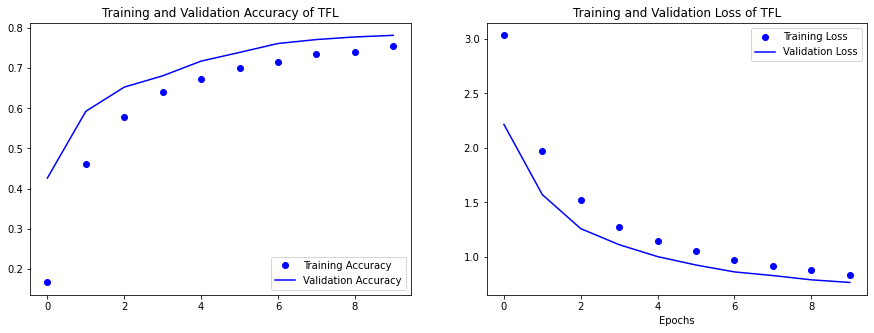

In [213]:
model_visualization(model,history,10,'TFL')

In [215]:
model.save('Transfer_learning.h5')
files.download('Transfer_learning.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Model Evaluation

Now we will evaluate the models on the test data and calculates the prediction accuracy.

In [153]:
def accuracy(model,modelname):
  score = model.evaluate(test_dataset, verbose=0)
  print('Test loss of {}:'.format(modelname), score[0])
  print('Test accuracy of {}:'.format(modelname), score[1])
  return score[0],score[1]

In [158]:
cnn_1_loss,cnn_1_accu = accuracy(cnn_1_model,"CNN1")

cnn_3_loss,cnn_3_accu = accuracy(cnn_3_model,"CNN3")

cnn_4_loss,cnn_4_accu = accuracy(cnn_4_model,"CNN4")



Test loss of CNN1: 1.3912644386291504
Test accuracy of CNN1: 0.5852272510528564
Test loss of CNN3: 1.123755931854248
Test accuracy of CNN3: 0.7215909361839294
Test loss of CNN4: 1.6024547815322876
Test accuracy of CNN4: 0.5710227489471436


In [159]:
Tl_loss,Tl_acc = accuracy(model,"TL")

Test loss of TL: 0.4410194456577301
Test accuracy of TL: 0.8693181872367859


In [176]:
import pandas as pd


name = ["KNN1","KNN3","KNN4","Transfer"]
accuracy = [cnn_1_accu,cnn_3_accu,cnn_4_accu,Tl_acc]
loss = [cnn_1_loss,cnn_3_loss,cnn_4_loss,Tl_loss]
df = pd.DataFrame({"Model"               : name,
                       "Accuracy Score"      : accuracy,
                       "Loss"                 : loss
                       
                       
                      })



In [177]:
np.round(df,4)

,Model,Accuracy Score,Loss
0,KNN1,0.5852,1.3913
1,KNN3,0.7216,1.1238
2,KNN4,0.5710,1.6025
3,Transfer,0.8693,0.4410


Comparing all the models the Transfer learning with 'MobileNet' performed well. The low test accuracy of KNN4 model may be due to overfitting.

## Future Scope
To improve the performance of the model ideally, we could collect more data. As for now, the possible ways are
1. Tuning hyperparamters using Keras.Tuner
2. Including regularization in the model
3. Improving model with more deep layers